In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('HWAssignment_Dataset.csv')

In [4]:
dfK8Math = df[df['AssessmentSubject'] == 'Math']

df2016_2017 = dfK8Math.loc[dfK8Math['SchoolYear'] == '2016-2017']
df2017_2018 = dfK8Math.loc[dfK8Math['SchoolYear'] == '2017-2018']

# Track Students (one year to the next). Will include effect of returning, leaving and entering students into Aspire
studentsMath3to7_2017 = df2016_2017.loc[df['Student_Grade_Level'].isin(['03','04', '05', '06', '07'])]
studentsMath4to8_2018 = df2017_2018.loc[df['Student_Grade_Level'].isin(['04', '05', '06', '07','08'])]

# Track Schools (Same grades across years)
schoolMath4to7_2017 = df2016_2017.loc[df['Student_Grade_Level'].isin(['04','05', '06', '07'])]
schoolMath4to8_2018 = df2017_2018.loc[df['Student_Grade_Level'].isin(['04', '05', '06', '07'])]

In the following two sections, 'Change in scores by school and year' and 'Change is scores by school and students'
we attempt to ascertain is changes in mean score can be attributed to student body change. We use bar graphs and coorelation computation.

### Change is scores by school

In [5]:
scores2016_2017 = schoolMath4to7_2017.groupby(['School'])['PercentScore'].agg(['mean'])
scores2017_2018 = schoolMath4to8_2018.groupby(['School'])['PercentScore'].agg(['mean'])

schoolChange = scores2017_2018['mean'] - scores2016_2017['mean']
#ax = schoolChange.plot.bar(x='School', y='mean', rot=0)

### Change in students population by school and grade

In [5]:
studentBody2017 = studentsMath3to7_2017['Hashed_StudentNumber']
studentBody2018 = studentsMath4to8_2018['Hashed_StudentNumber']

In [6]:
s1 = set(studentBody2017)
s2 = set(studentBody2018)

In [7]:
enteringStudents = s2 - s1
leavingStudents = s1 - s2
returningStudents = s2 - set(list(enteringStudents) + list(leavingStudents))
len(s1), len(s2), len(enteringStudents), len(leavingStudents), len(returningStudents)

(6122, 6128, 1216, 1210, 4912)

In [8]:
studentsMath3to7_2017i = studentsMath3to7_2017.set_index('Hashed_StudentNumber')
studentsMath4to8_2018i = studentsMath4to8_2018.set_index('Hashed_StudentNumber')

In [9]:
ReturningStudents = studentsMath4to8_2018i.loc[returningStudents]
EnteringStudents = studentsMath4to8_2018i.loc[enteringStudents]
LeavingStudends =  studentsMath3to7_2017i.loc[leavingStudents]

In [11]:
studentsMath3to7_2017i['PercentScore'].mean(), LeavingStudends['PercentScore'].mean()

(0.42216226998860906, 0.4014844187963711)

In [12]:
studentsMath4to8_2018i['PercentScore'].mean(), EnteringStudents['PercentScore'].mean()

(0.4328469294673435, 0.38159065573770395)

In [14]:
allStudentsStats = studentsMath4to8_2018i.groupby(['School'])['PercentScore'].agg(['count','mean'])

enteringStudentsStats = EnteringStudents.groupby(['School'])['PercentScore'].agg(['count','mean'])
returningStudentStats = ReturningStudents.groupby(['School'])['PercentScore'].agg(['count','mean'])
leavingStudendsStats = LeavingStudends.groupby(['School'])['PercentScore'].agg(['count','mean'])

studentChange = enteringStudentsStats['mean'] - allStudentsStats['mean']

# Moments usefull in determine how much student changes drive the mean (count and mean difference both matter)
allStudentsStats['moment'] = allStudentsStats['mean']*allStudentsStats['count']
enteringStudentsStats['moment'] = enteringStudentsStats['mean']*enteringStudentsStats['count']


#print(studentChange.head())

#ax = studentChange.plot.bar(x='School', y='mean', rot=0)

School
ACA    -0.044910
AFA    -0.111591
AGA    -0.064426
AIA     0.015191
AMLA   -0.065158
Name: mean, dtype: float64


In [15]:
dfcompare = pd.DataFrame({'StudentChange':studentChange, 'SchoolChange':schoolChange})

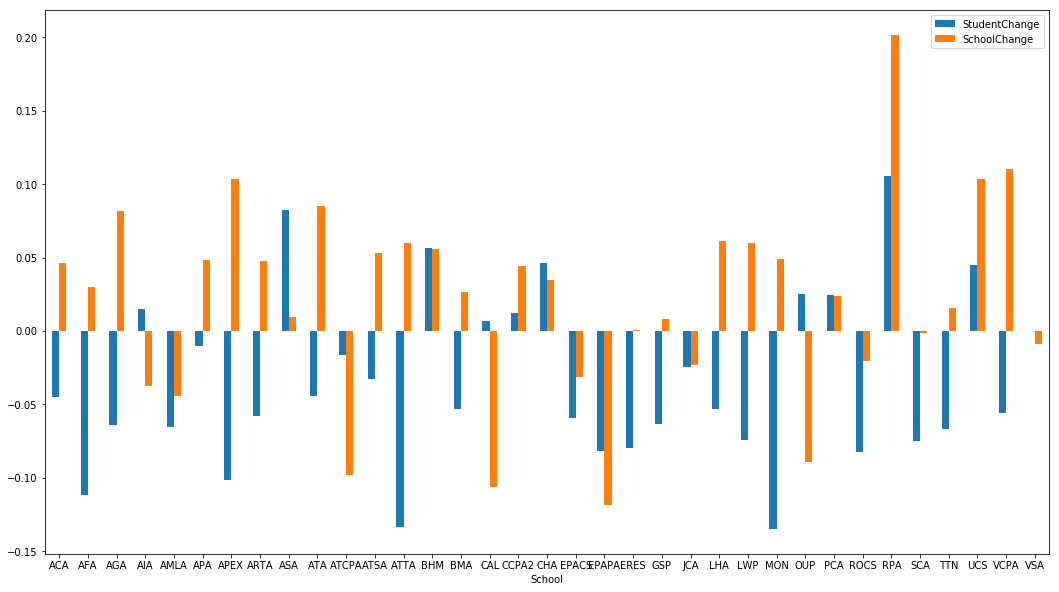

In [18]:
ax = dfcompare.plot.bar(rot=0,figsize=(18,10))

In [140]:
dfcompare.corr()

,StudentChange,SchoolChange
StudentChange,1.000000,0.101343
SchoolChange,0.101343,1.000000


The Difference of scores between schools has little or no correlation with the change of students with our sample accross all schools. This suggest that changes in student body are not the reason for improved math scores across schools.  Thus at least for the sixth grade, improvement in scores may in fact be due to change in instructional methods.  But to really be sure.  Additional years of sampling are needed.  Also, it may be useful to make changes in delivery of student instruction and resouce across a random selection of schools in order to de-correlate with an other confounding factors. Since the correlation is very small, use of moments will not be used in analysis.